In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
train_set_path = 'ex3data1.mat'
weight_path = 'ex3weights.mat'

## Load Data

In [3]:
def loadData(path):
    data = loadmat(path)
    return data

In [4]:
train_dataset = loadData(train_set_path)
X = train_dataset['X']
y = train_dataset['y']

## Vision

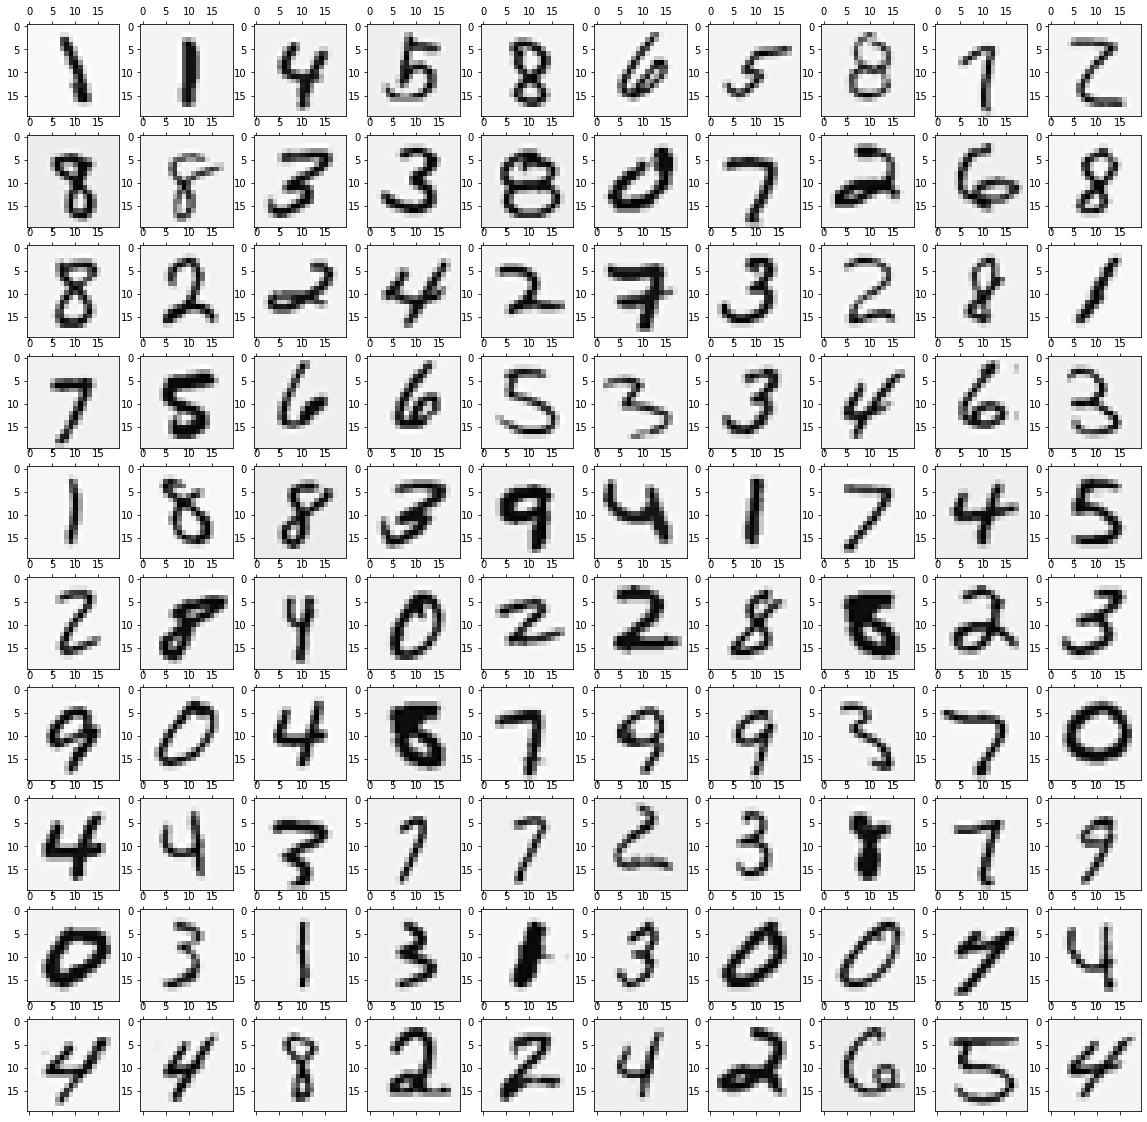

In [5]:
# 从X 中随机选择100 行，并将这100行传递给可视化数据函数。该函数将每
# 一行映射到20 像素乘20 像素的灰度图像，并将图像显示在一起。
def data_show(X):
    idx = np.random.choice(X.shape[0],100)
    # idx = np.arange(100)
    imgs = X[idx]
    fig, axs = plt.subplots(10,10,figsize = (20,20))
    for row in range(10):
        for col in range(10):
            axs[row,col].matshow(imgs[10*row + col].reshape(20,20).T, cmap = 'gray_r')
    plt.show()

data_show(X)

## Network

In [6]:
W_init= loadData(weight_path)
theta1 = W_init['Theta1']
theta2 = W_init['Theta2']

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [8]:
def feedforward_propagation(X,y):
    a1 = X.T
    a1 = np.insert(a1,0,values=1,axis=0)
    z2 = theta1@a1
    z2 = np.insert(z2,0,values=1,axis=0)
    a2 = sigmoid(z2)
    # print(a2.shape)
    z3 = theta2@a2
    a3 = sigmoid(z3)
    return a3
hx = feedforward_propagation(X,y)
# print(hx.shape)


## predict and get accuracy

In [9]:
def predict(hx):
    label = np.argmax(hx, axis=0)
    cnt = 0
    for i in range(len(label)):
        if(label[i]+1==y[i]):
            cnt += 1
    acc = cnt/len(label)
    return acc

acc = predict(hx)
acc

0.9752